### CSV모듈 사용하기
#### csv.reader() 함수 사용

In [ ]:
import csv

with open("./datas/temp_seoul.csv") as f:
    data = csv.reader(f) #f-파일 객체
    header = next(data) #제목행 next() - 다음행으로 이동
#     print(header)
    for row in data:
        if row[-1] == '': #최고기온이 누락된 경우(빈문자열)
            row[-1] = -999 #터무니없는 숫자로 설정
        row[-1] = float(row[-1]) # 최고기온을 숫자형으로 변환(float()-실수형)
        print(row)     

In [ ]:
import csv

max_temp =0  # 최고기온 저장 변수
max_data = '' # 최고기온이 있는 날짜

with open("./datas/temp_seoul.csv") as f:
    data = csv.reader(f) #f-파일 객체
    header = next(data) #제목행 next() - 다음행으로 이동
#     print(header)
    for row in data:
        if row[-1] == '': #최고기온이 누락된 경우(빈문자열)
            row[-1] = -999 #터무니없는 숫자로 설정
        row[-1] = float(row[-1]) # 최고기온을 숫자형으로 변환(float()-실수형)
        row[0] = row[0].replace('\t','') 
#         print(row)
        # 최대값구하기
        if max_temp < row[-1]:
            max_temp = row[-1]
            max_data = row[0]

print(f'최고기온 : {max_temp}, 날짜 : {max_data}')

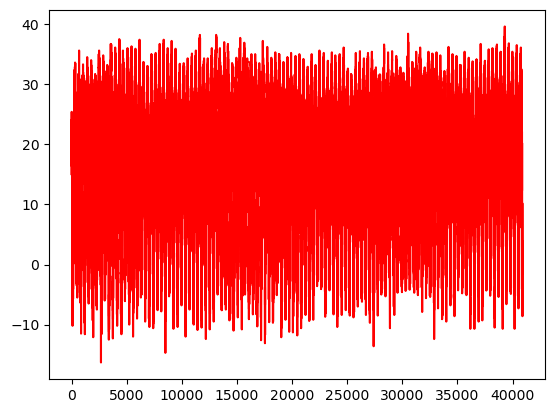

In [54]:
#최고기온 데이터 리스트를 시각화

import csv
import matplotlib.pyplot as plt

with open("./datas/temp_seoul.csv") as f:
    data = csv.reader(f) #f-파일 객체
    header = next(data) #제목행 next() - 다음행으로 이동
    result = [] #최고 기온들을 저장할 리스트
    
    for row in data:
        if row[-1] != '': #누락되지 않을 데이터를 저장
            result.append(float(row[-1])) # 최고기온을 숫자형으로 변환(float()-실수형)
            
        #print(len(result)  
         #print(result)  
plt.plot(result, 'r')
plt.show()

###내 생일의 최고 기온 데이터 시각화하기

In [56]:
with open("./datas/temp_seoul.csv") as f:
    data = f.reader(f)
    next(data)
    for row in data:
        print(row, end='')

AttributeError: '_io.TextIOWrapper' object has no attribute 'reader'

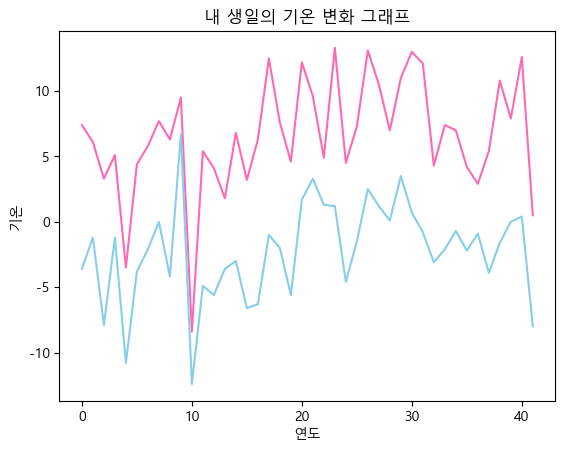

In [76]:
#1980년 이후 생일 데이터 시각화

with open("./datas/temp_seoul.csv",'r') as f:
    data = csv.reader(f) #data 리스트로 저장
    next(data)
    high = [] #최고 기온값 저장
    low = [] #최저 기온
    
    for row in data:
        #생일이 2월 22일 이면
        if row[-1] != "" and row[-2] !="":  #최고기온과 최저기온이 빈 문자열이 아니면 
            if int(row[0].split('-')[0]) > 1980: #연도가 1980년 보다 크면(정수형으로 변환)
                if row[0].split('-')[1] == '02' and row[0].split('-')[2]=='22' : #5월 11일
                    high.append(float(row[-1])) #실수로 변환
                    low.append(float(row[-2]))

#print(high)    
#print(low)  
plt.rc('font',family="Malgun Gothic")  #한글 글꼴 추가
plt.rcParams['axes.unicode_minus'] = False
plt.title("내 생일의 기온 변화 그래프")
plt.plot(high,'hotpink')
plt.plot(low,'skyblue')
plt.xlabel('연도')
plt.ylabel('기온')
plt.show()
